# The Iris Project
___

Feito por:

- Rafael Almada

- Rafael Rosensvaig

Projeto de Visão Computacional $\sim$
Engenharia da Computação $\sim$
Insper

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

%matplotlib inline

In [1]:
try:
    import G6_iris_recognition
except:
    print("Could not find the folder containing the package!")

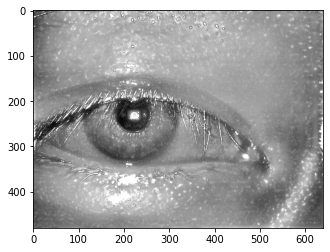

In [23]:
for i in range(1):
    img = cv2.imread("images/00{}/00{}_000.bmp".format(str(i).zfill(2),str(i).zfill(2)))
    #Black and white conversion
    bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rows, cols = bw_img.shape

    #Decrease brightness of brightest areas of image
    treshhold = 200
    for x in range(rows):
        for y in range(cols):
            if bw_img[x][y] > treshhold:
                bw_img[x][y] = bw_img[x][y]*0.5

    

    #FFT high pass filter
    imgfft=np.fft.fft2(bw_img)
    fshift = np.fft.fftshift(imgfft)
    crow,ccol = (int)(rows/2) , (int)(cols/2)
    fshift[crow-20:crow+20, ccol-20:ccol+20] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    fft_img = bw_img.copy()
    for x in range(rows):
        for y in range(cols):
            if img_back[x][y] < 20:
                fft_img[x][y] = int(img_back[x][y])
                #saves the result for later

    #Removing noise from bw_img by applying blur
    blur_img=cv2.GaussianBlur(bw_img,(9,9),0)

    #Equalizing histogram on the original bw image
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(5,5))
    imgeq= clahe.apply(blur_img)

    #Detail enhance filter on the original bw image
    sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
    img_sharp = cv2.filter2D(imgeq, -1, sharpen_kernel)

    img_final = cv2.addWeighted(img_sharp, 0.9, fft_img, 3.9, 0.0)

    plt.imshow(img_final, cmap='gray')
    plt.show()


In [14]:
class ImageFilter(object):
    '''
    Classe automatizada de filtragem de imagens.
    Feito por: Rafael Almada e Rafael Vieira Rosenzvaig
    Insper - Engenharia da Computação - Visão Computacional 2020.2
    '''
    
    def __init__(self, verbose = False, single = False):
        '''
        Vebose : Se verdadeiro, usuário irá receber feedback enquanto a aplicação roda
        Single : Funcionalidade para testes únicos de filtro
        '''
        import time
        self.t0 = time.time()
        self.verbose = verbose
        if (single == False):
            self.start()
        else:
            c = 0
            wanted_filters = []
            while (True):
                print("Insira o nome do filtro " + str(c) + ":")
                f = str(input("> "))
                print(f)
                if (f != "end"):
                    wanted_filters.append(f)
                    c += 1
                else:
                    break
                    
            print("wanted = " + str(wanted_filters))
            print("Insira agora o path para a imagem do teste: ")
            the_img = str(input("> "))
            img = cv2.cvtColor(cv2.imread(the_img), cv2.COLOR_BGR2GRAY)
            self.img = self.single_shot(wanted_filters, img)
    
    def single_shot(self, wanted_filters, img):
        '''
        Função criada para o teste de filtros em uma imagem só.
        Usuário deverá passar uma lista "wanted_filters" com o nome dos filtros desejados e já implementados
        Além disso, é necessário passar as imagens já em preto e branco como argumento
        '''
        out = img.copy()
        for f in wanted_filters:
            if (self.verbose == True):
                print("Aplicando Filtro " + f + "...")
                try:
                    filter_method = getattr(self, f)
                    out = filter_method()
                except AttributeError:
                    raise NotImplementedError("Class `{}` does not implement `{}`".format(self.__class__.__name__, f))
        self.t1 = time.time()
        elapsed = self.t1 - self.t0
        if (verbose == True):
            print("Tempo utilizado para aplicar os filtros: " + str(elapsed))
        return out
            
    
    def start(self):
        nod = 60
        nof = 20
        print("====Iniciando tratamento das imagens====\n")
        self.organiza_arquivos(nod, nof)
        
    def set_image(self, path_to_img):
        '''
        Função que coloca uma imagem como a imagem central do objeto da classe
        path_to_img : Literalmente o path para encontrar a imagem
        '''
        self.image = cv2.cvtColor(cv2.imread(path_to_img), cv2.COLOR_BGR2GRAY)
        my_output = self.image.copy()
        self.out = my_output
        
    # def eq_histogram(self):
    #     return cv2.equalizeHist(self.image)
    
    # def sharpening(self, imgf):
    #     sharpen_kernel = np.array([[ 0, -1,  0],
    #                                [-1,  5, -1],
    #                                [ 0, -1,  0]])
    #     imgf = cv2.filter2D(imgf, -1, sharpen_kernel)
    #     return imgf
    
    # def clareador(self, img, T = None, v = 0.5):
    #     '''
    #     Essa função tem por objtivo clarear parte da imagem que está mais escura, sem clarear a imagem por inteiro
    #     T => Threshold
    #     v => % de aumento na luminosidade do pixelb
    #     '''
    #     if T is None:
    #         T = np.median(img)
    #     new = img.copy()
    #     for row in range(img.shape[0]):
    #         for col in range(img.shape[1]):
    #             if (img[row, col] > T):
    #                 continue
    #             else:
    #                 new[row, col] *= 1 + v
    #     return new
    
    # def contrast(img, v, T = None):
    #     '''
    #     Função para aumentar o contraste de uma imagem
    #     img => Imagem em Gray Scale
    #     v => Valor do contraste em porcentagem
    #     T => Threshold (padrão = np.median(img))
    #     '''
    #     if T is None:
    #         T = np.median(img)

    #     out = img.copy()
    #     a = 1 + v
    #     for row in range(img.shape[0]):
    #         for col in range(img.shape[1]):
    #             if (img[row, col] > T):
    #                 out[row, col] *= a
    #             else:
    #                 out[row, col] /= a
    #     return out
    
    def aplica_filtros(self):
        '''
        Rotina de uso dos filtros na imagem
        '''
        # imgeq = self.eq_histogram()
        # imgf = self.sharpening(imgeq)
        # new = self.clareador(imgf)
        # self.out = self.sharpening(new)
        bw_img = self.image.copy()
        rows, cols = bw_img.shape

        #Decrease brightness of brightest areas of image
        treshhold = 200
        for x in range(rows):
            for y in range(cols):
                if bw_img[x][y] > treshhold:
                    bw_img[x][y] = bw_img[x][y]*0.5

        #FFT high pass filter
        imgfft=np.fft.fft2(bw_img)
        fshift = np.fft.fftshift(imgfft)
        crow,ccol = (int)(rows/2) , (int)(cols/2)
        fshift[crow-20:crow+20, ccol-20:ccol+20] = 0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        fft_img = bw_img.copy()
        for x in range(rows):
            for y in range(cols):
                if img_back[x][y] < 20:
                    fft_img[x][y] = int(img_back[x][y])
                    #saves the result for later

        #Removing noise from bw_img by applying blur
        blur_img=cv2.GaussianBlur(bw_img,(9,9),0)

        #Equalizing histogram on the original bw image
        clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(5,5))
        imgeq= clahe.apply(blur_img)

        #Detail enhance filter on the original bw image
        sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
        img_sharp = cv2.filter2D(imgeq, -1, sharpen_kernel)

        self.out = cv2.addWeighted(img_sharp, 0.9, fft_img, 3.9, 0.0)
        
    def salva_imagem(self, new_path):
        cv2.imwrite(new_path, self.out)
        if (self.verbose):
            print("new file saved: " + new_path + " -- OK")

    def organiza_arquivos(self, nod, nof):
        '''
        nod : Number of Directories
        nof : Number of Files
        '''
        # Primeiro iremos atrás de imagem por imagem do diretório "Images/" para filtrar
        for i in range(nod):
            if (i < 10):
                dir = "000" + str(i)
            else:
                dir = "00" + str(i)
            for j in range(nof):
                if (j < 10):
                    file = dir + "_00" + str(j) + ".bmp"
                else:
                    file = dir + "_0" + str(j) + ".bmp"
                path_to_img = "images/" + dir + "/" + file
                if (self.verbose):
                    print("reading: " + path_to_img)
                
                # Coloca a nova imagem em questão
                self.set_image(path_to_img)
                
                # Aplica os filtros na ordem dada à imagem
                self.aplica_filtros()
                
                # Salvando imagem com o filtro
                new_path = "tests/" + dir + "/" + file
                self.salva_imagem(new_path)
        self.t1 = time.time()
        elapsed = self.t1 - self.t0
        
        print("\n====Fim da filtragem!====")
        print("Tempo decorrido: " + str(elapsed))

In [12]:
# O uso da classe é o seguinte:

# Primeiro é necessário se ter a base com todas as imagens já em "./images/"
# Depois criamos um objeto usando a classe
## Caso o usuário deseje, pode passar o argumento verbose como True para ter uma resposta da aplicação enquanto ela roda, mas é possível não passar nada também!
## Ex: f_obj = ImageFilter()

#f_obj = ImageFilter(verbose = True)

# Depois esperamos a classe terminar de filtrar as imagens

# Por fim podemos treinar a rede

In [15]:
# Teste do single shot
f_obj = ImageFilter()
plt.imshow(f_obj.img)
plt.show()

====Iniciando tratamento das imagens====



NameError: name 'time' is not defined

In [2]:
#Train the model with filtered images
G6_iris_recognition.iris_model_train("tests_train","model.pickle")

directory_list ['tests_train/0003', 'tests_train/0004', 'tests_train/0002', 'tests_train/0000', 'tests_train/0001']
name 0003
path_to_image tests_train/0003/0003_016.bmp
path_to_image tests_train/0003/0003_002.bmp
path_to_image tests_train/0003/0003_003.bmp
path_to_image tests_train/0003/0003_017.bmp
path_to_image tests_train/0003/0003_001.bmp
path_to_image tests_train/0003/0003_015.bmp
path_to_image tests_train/0003/0003_010.bmp
path_to_image tests_train/0003/0003_011.bmp
path_to_image tests_train/0003/0003_005.bmp
path_to_image tests_train/0003/0003_013.bmp
path_to_image tests_train/0003/0003_007.bmp
path_to_image tests_train/0003/0003_006.bmp
path_to_image tests_train/0003/0003_012.bmp
path_to_image tests_train/0003/0003_009.bmp
path_to_image tests_train/0003/0003_019.bmp
path_to_image tests_train/0003/0003_018.bmp
name 0004
path_to_image tests_train/0004/0004_009.bmp
path_to_image tests_train/0004/0004_008.bmp
path_to_image tests_train/0004/0004_018.bmp
path_to_image tests_train/00

['0003', '0004', '0002', '0000', '0001']

In [15]:
#Check if the model is working
for i in range(15):
    for k in range(15):
        iris_name = G6_iris_recognition.iris_model_test("model.pickle","images/00{}/00{}_0{}.bmp".format(str(i).zfill(2),str(i).zfill(2),str(k).zfill(2)))
        print(iris_name)

ion1
unmatch
0001
locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
0001
locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
0001
0001
locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
locate expression 1 local variable 'east_mark' referenced before assignment
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
0001
0001
locate expression 1 index 640 is out of bounds for axis 1 with size 640
rectangle expression2 not enough values to unpack (expected 2, got 1)
unmatch
locate expression 1 local variable 'e

KeyboardInterrupt: 

In [31]:
#For Mac users only!!!!!
# Removes .DS_Store from the testing directories
#.DS_Stories is a file used by Finder application to manage folders and files in MacOS
import os
for i in range(60):
    if os.path.isfile("tests_train/00"+str(i).zfill(2)+"/.DS_Store"):
        os.remove("tests_train/00"+str(i).zfill(2)+"/.DS_Store")